# Graph Lab

## Header information:

  - Author #1: Akanksha Nehete (nehetea@mcmaster.ca)
  - Author #2: Anna Yang (yanga49@mcmaster.ca)
  - Gitlab URL: http://gitlab.cas.mcmaster.ca/nehetea/l1-graph-lab
  - Avenue to Learn group name: 19

## Class UML Diagram
![UML](Lab_1_GraphUML.jpg)

## Design Choices

Single Responsibility Principle

   - We chose to take a very modular approach to our design as we wanted it to heavily reflect the single responsibility principle. This is why each of our classes has only one responsibility/purpose. For example, our Graph_builder class is solely responsible for taking a dictionary of london subway stations and connections and making it into a graph. The actual implementation of the graph data structure and actually converting the .csv file into the dictionary are the responsibilities of two other classes: Graph.py and Csv_reader.py, respectively. Furthermore, we have two different algorithms in our design to find the shortest path in a graph. We encapsulated both of these algorithms in a seperate class. Using the single responsibility principle in this case allowed us to use the strategy design pattern, in which the client is able to pick which shortest path algorithm to use. In addition, both algorithms use the Priority_Queue class, which provides an example of how giving each class a single responsibility makes it reusable. Incorporating this principle into our design also allowed effective collaboration between our group as we were able to divide up the assignment into several smaller classes which each had a single purpose. This allowed members of our group to work simultaneously and minimized the time needed to complete the code.


Open Closed Principle
- We wanted to make sure the design as a whole followed the open-closed principle (open for extension, but closed for modification) for object-oriented software development. There are two algorithm options for finding the shortest path in a graph that we needed to implement in our design in order to accomplish the same goal: find the shortest path between 2 nodes in a graph. This prompted us to use the Strategy design pattern, which allows us to define a family of algorithms, encapsulate each one, and then make their objects interchangeable. If in the future, more shortest-path algorithms were added, the programmer would simply have to make a new class file for the new algortihm and not have to modify any of the existing algorithms or classes. This makes the code easily extendable, but prevents the engineer from having to change all classes that depend on this method and break the code.

Interface Segregation Principle
- add writing here


Explanation of Overall Code
- The Csv_reader reads any file (stations, lines, connections) and extracts the information into dictionaries that can be accessed by the Graph_builder. Graph_builder uses the output of the reader to create a Graph, with stations represented as Nodes, connections represented as edges, and time represented as the edge weight. The graph uses an adjacency list representation in which all connections to a node are stored in an adjacency list by the node object. A Station_Node subclass also contains the more specific attributes of each station. The Station_Node subclass inherits from Node, thus having all the properties of a regular node but also contains properties specific to the london subway network (e.g name, latitude, longitude,A Metric_Extractor takes in a graph to obtain useful metrics. This is then used by a Plotter to display the graph metrics to the user. Another class that uses Graph is Itinerary, which is able to model an itinerary between two stations by using a shortest path algorithm. Itinerary functions as a shortest path algorithm factory. Dijkstra and A* shortest path algorithms are implementations of the ShortestPath interface.

Division of Work
- Akanksha implemented the Graph.py, Node.py,Station_Node.py, Graph_builder.py, Metric_Extractor.py, Itinerary.py and Plotter.py classes. She also implemented the strategy design pattern when given the implementations of the A* and Dijkstra algorithms and drew the UML Class Diagram of the design. She also wrote an explanation of the design patterns and principles used in the assignment.

- Anna implemented the Csv_reader.py class, as well as provided an implementation of the two shortest path algorithms, contained in the files Dijkstra.py and A_star.py. She also implemented Priority_Queue.py, a priority queue implementation used by both pathfinding algorithms. Anna also wrote a benchmark to compare itinerary finding implementations, and measured both execution time and KPI's for each of the shortest path algorithms. She also wrote an explanation of the overall code and how it works.


## Library Usage


In [1]:
# importing all files required from the library
from Graph_builder import Graph_builder
from Graph import Graph
from Csv_reader import Csv_reader
from Metric_Extractor import Metric_Extractor
from Itinerary import Itinerary
from Graph_Algorithms.Dijkstra import Dijkstra
from Graph_Algorithms.A_star import A_star

In [2]:
# reading the csv files into dictionaries
csv_reader = Csv_reader()
#intitalizing graph builder object which has a graph object
london_sub_graph = Graph_builder(csv_reader, Graph())
# creates graph nodes of the london subway graph
london_sub_graph.create_station_nodes('_dataset/london.stations.csv')
london_sub_graph.create_connections('_dataset/london.connections.csv')
# printing all connections in the created london subway graph
london_sub_graph.graph.print_all_connections()

( 1 , 52,   2, 4)
( 1 , 73,   2, 10)
( 1 , 234,   4, 10)
( 1 , 265,   3, 10)
( 2 , 156,   2, 8)
( 2 , 263,   4, 3)
( 3 , 263,   2, 4)
( 3 , 295,   2, 6)
( 3 , 156,   4, 6)
( 4 , 70,   2, 13)
( 4 , 201,   2, 13)
( 5 , 194,   3, 10)
( 5 , 252,   2, 10)
( 7 , 145,   2, 9)
( 7 , 188,   3, 9)
( 8 , 124,   3, 9)
( 8 , 264,   2, 9)
( 9 , 31,   3, 10)
( 9 , 232,   3, 10)
( 10 , 95,   2, 10)
( 10 , 128,   1, 10)
( 11 , 163,   1, 1)
( 11 , 212,   2, 1)
( 11 , 83,   3, 6)
( 11 , 104,   3, 8)
( 11 , 28,   2, 7)
( 11 , 249,   4, 7)
( 11 , 94,   6, 8)
( 12 , 56,   2, 9)
( 12 , 257,   1, 9)
( 13 , 156,   2, 2)
( 13 , 250,   2, 2)
( 13 , 225,   2, 13)
( 13 , 157,   2, 9)
( 13 , 167,   3, 9)
( 13 , 279,   4, 12)
( 14 , 92,   1, 8)
( 14 , 167,   2, 8)
( 15 , 78,   4, 6)
( 15 , 269,   2, 4)
( 16 , 91,   2, 2)
( 16 , 173,   2, 2)
( 17 , 110,   2, 10)
( 17 , 293,   2, 4)
( 17 , 74,   3, 10)
( 18 , 186,   2, 4)
( 18 , 193,   2, 4)
( 19 , 97,   2, 13)
( 20 , 65,   2, 13)
( 20 , 217,   2, 13)
( 21 , 67,   3, 

Average Node Degree: 2.6887417218543046
Total Edge Count: 406
Total Node Count: 302
Degree count of Station_id 126: 4


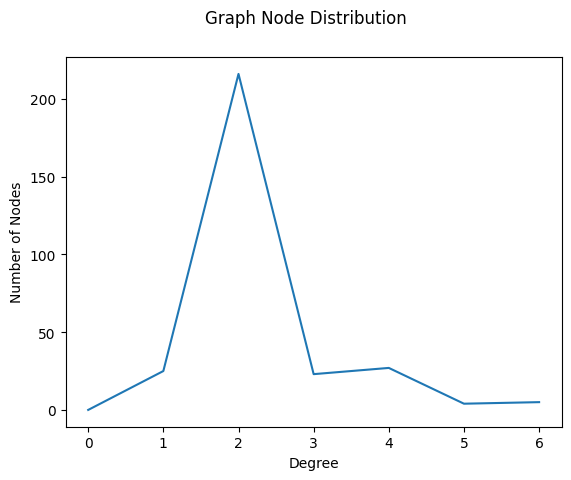

In [3]:
# create a metric extractor for the london subway graph in order to access its metrics
london_sub_metrics = Metric_Extractor(london_sub_graph.graph)
# printing graph metrics of london subway graph
print('Average Node Degree: '+str(london_sub_metrics.get_avg_degree()))
print('Total Edge Count: '+str(london_sub_metrics.get_edge_count()))
print('Total Node Count: '+str(london_sub_metrics.get_node_count()))
print('Degree count of Station_id 126: ' + str(london_sub_metrics.get_degree(126)))

# plotting the node distribution of the graph
london_sub_metrics.plot_node_dist()

In [4]:
# creating an itinerary from station 36 to station 289 in order to find the shortest path
# setting the find shortest path method to Dijkstra
itinerary1 = Itinerary(london_sub_graph.graph, 36, 289, Dijkstra())

# finding the shortest path between 2 stations using the previously stated method
print(itinerary1.find_shortest_path())

num of inserts =  2
num of visited =  2
Travel time: 2
36 -> 289


In [5]:
# example of another itinerary using Dijkstra
itinerary2 = Itinerary(london_sub_graph.graph, 37, 123, Dijkstra())
print(itinerary2.find_shortest_path())

num of inserts =  131
num of visited =  120
Travel time: 35
37 -> 301 -> 241 -> 230 -> 154 -> 153 -> 247 -> 164 -> 24 -> 156 -> 167 -> 188 -> 7 -> 145 -> 123
